<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Nicholas_George_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [36]:
#for the drunk example from class
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    p_drunk = ((prob_positive_drunk * prob_drunk_prior) / (prob_positive)) * 100
    return p_drunk

print(prob_drunk_given_positive(1,.08,.001), '%')


1.25 %


In [37]:
#drug example from class

#4 parameters to pass in for the drug example
#Positive User
tru_pos = 0.99
#User
drug_user = 0.005
#Positive Non User
non_user = 0.01
#Non User
pos_user = .995

def prob_positive_given_random(tru_pos, drug_user, non_user, pos_user):
  p_user_plus = (tru_pos * drug_user) / ((tru_pos * drug_user) + (non_user * pos_user)) * 100
  return p_user_plus

print(round(prob_positive_given_random(tru_pos, user, non_user, pos_user),3),'%')

33.221 %


In [29]:
prob_positive_given_random(0.95, 0.006, 0.01, .994)

36.44501278772378

##Scenario 2

Suppose that a test for using a particular drug is **80%** sensitive and 99% specific. That is, the test will produce **80%** true positive results for drug users and **80%** true negative results for non-drug users. Suppose that **1%** of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

In [30]:
prob_positive_given_random(0.80, 0.01, 0.2, .99)

3.8834951456310676

##Scenario 3

Suppose that a test for using a particular drug is **60%** sensitive and 60% specific. That is, the test will produce **60%** true positive results for drug users and **60%** true negative results for non-drug users. Suppose that **20%** of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

In [31]:
prob_postive_given_random(0.60, .20, .40, .80)

27.27272727272727

In [26]:
#Bayesian confidence intervals for the mean, var, and std.
#find with this function: scipy.stats.bayes_mvs

#mean_cntr, var_cntr, std_cntrtuple
#The three results are for the mean, variance and 
#standard deviation, respectively. Each result is 
#a tuple of the form:(center, (lower, upper))
#with center the mean of the conditional pdf of 
#the value given the data, and (lower, upper) a 
#confidence interval, centered on the median, containing 
#the estimate to a probability alpha.

import numpy as np
from scipy import stats

#example
data = [236, 191, 218, 229, 84, 235, 162, 66, 
        18, 50, 269, 195, 33, 55, 157, 29, 79, 
        252, 45, 250, 135, 80, 90, 132, 202, 210, 
        299, 123, 264, 99, 241, 47, 272, 271, 37, 
        32, 290, 48, 109, 284, 111, 76, 267, 124, 
        26, 200, 108, 86, 17, 152]
mean, var, std = stats.bayes_mvs(data)
print(mean)
print(var)
print(std)

Mean(statistic=145.7, minmax=(124.36630079073277, 167.0336992092672))
Variance(statistic=8440.478723404256, minmax=(5979.9605026542085, 11691.68661373266))
Std_dev(statistic=91.38473081178017, minmax=(77.3302043360433, 108.12810279355067))


##Frequentist Approach

Great article, my notes/summary below:
https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/

The problem with the frequentist approach is the "Dependence of the result of an experiment on the number of times the experiment is repeated."

That is to say the normal distribution will only start to show up on an experiment repeated a large amount of times. 

On top of that, if two people decide to flip coins as separate experiments, say person 1 flips 100 coins but person 2 flips 1000 coins, the p-values will vary, which is undesirable. 

Confidence Intervals also depends heavily on sample size. 

Confidence Intervals (C.I) are not probability distributions therefore they do not provide the most probable value for a parameter and the most probable values.

##Bayesian Approach

“Bayesian statistics is a mathematical procedure that applies probabilities to statistical problems. It provides people the tools to update their beliefs in the evidence of new data.”

In [60]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

#flipping a coin 10 times, counting how many times heads occured
np.random.seed(42)
n=10
p=0.5
# let us repeat our experiment for 500 times
size=500
cointoss=np.random.binomial(n=n, p=p, size=size)
cointoss

array([4, 8, 6, 5, 3, 3, 3, 7, 5, 6, 2, 8, 7, 4, 4, 4, 4, 5, 5, 4, 5, 3,
       4, 4, 5, 6, 4, 5, 5, 2, 5, 3, 3, 8, 8, 6, 4, 3, 6, 5, 3, 5, 2, 7,
       4, 6, 4, 5, 5, 4, 8, 6, 7, 7, 5, 7, 3, 4, 2, 4, 5, 4, 7, 4, 4, 5,
       3, 6, 3, 8, 6, 4, 1, 6, 6, 6, 6, 3, 4, 3, 7, 6, 4, 3, 4, 4, 6, 6,
       7, 5, 3, 6, 6, 5, 6, 5, 5, 5, 2, 3, 2, 6, 4, 5, 7, 4, 5, 6, 4, 3,
       4, 3, 7, 6, 6, 7, 6, 4, 7, 5, 6, 7, 4, 3, 4, 5, 6, 7, 1, 5, 5, 4,
       3, 4, 7, 4, 5, 6, 4, 8, 8, 4, 5, 4, 4, 2, 5, 5, 2, 4, 7, 4, 3, 5,
       8, 4, 6, 6, 4, 6, 4, 6, 6, 5, 3, 7, 4, 4, 2, 5, 6, 2, 5, 4, 6, 4,
       6, 5, 7, 3, 4, 3, 7, 7, 4, 6, 6, 5, 5, 4, 3, 7, 7, 6, 4, 4, 6, 7,
       7, 6, 6, 3, 3, 7, 5, 1, 3, 6, 1, 3, 5, 6, 6, 4, 6, 4, 4, 6, 6, 7,
       6, 5, 3, 4, 4, 4, 8, 5, 7, 6, 6, 5, 5, 5, 4, 6, 4, 2, 6, 4, 7, 8,
       7, 4, 2, 7, 5, 8, 8, 7, 4, 5, 7, 4, 3, 5, 7, 6, 5, 3, 5, 9, 3, 5,
       7, 6, 6, 6, 4, 4, 6, 6, 7, 7, 5, 5, 6, 6, 6, 6, 7, 4, 4, 3, 5, 2,
       5, 5, 4, 5, 2, 2, 6, 4, 3, 5, 6, 4, 5, 3, 2,

In [0]:
coinstossed = [4, 8, 6, 5, 3, 3, 3, 7, 5, 6, 2, 8, 7, 4, 4, 4, 4, 5, 5, 4, 5, 3,
       4, 4, 5, 6, 4, 5, 5, 2, 5, 3, 3, 8, 8, 6, 4, 3, 6, 5, 3, 5, 2, 7,
       4, 6, 4, 5, 5, 4, 8, 6, 7, 7, 5, 7, 3, 4, 2, 4, 5, 4, 7, 4, 4, 5,
       3, 6, 3, 8, 6, 4, 1, 6, 6, 6, 6, 3, 4, 3, 7, 6, 4, 3, 4, 4, 6, 6,
       7, 5, 3, 6, 6, 5, 6, 5, 5, 5, 2, 3, 2, 6, 4, 5, 7, 4, 5, 6, 4, 3,
       4, 3, 7, 6, 6, 7, 6, 4, 7, 5, 6, 7, 4, 3, 4, 5, 6, 7, 1, 5, 5, 4,
       3, 4, 7, 4, 5, 6, 4, 8, 8, 4, 5, 4, 4, 2, 5, 5, 2, 4, 7, 4, 3, 5,
       8, 4, 6, 6, 4, 6, 4, 6, 6, 5, 3, 7, 4, 4, 2, 5, 6, 2, 5, 4, 6, 4,
       6, 5, 7, 3, 4, 3, 7, 7, 4, 6, 6, 5, 5, 4, 3, 7, 7, 6, 4, 4, 6, 7,
       7, 6, 6, 3, 3, 7, 5, 1, 3, 6, 1, 3, 5, 6, 6, 4, 6, 4, 4, 6, 6, 7,
       6, 5, 3, 4, 4, 4, 8, 5, 7, 6, 6, 5, 5, 5, 4, 6, 4, 2, 6, 4, 7, 8,
       7, 4, 2, 7, 5, 8, 8, 7, 4, 5, 7, 4, 3, 5, 7, 6, 5, 3, 5, 9, 3, 5,
       7, 6, 6, 6, 4, 4, 6, 6, 7, 7, 5, 5, 6, 6, 6, 6, 7, 4, 4, 3, 5, 2,
       5, 5, 4, 5, 2, 2, 6, 4, 3, 5, 6, 4, 5, 3, 2, 5, 5, 6, 6, 8, 5, 4,
       6, 4, 5, 3, 2, 8, 7, 6, 5, 4, 3, 4, 5, 6, 6, 4, 8, 6, 5, 5, 5, 4,
       4, 6, 2, 3, 2, 2, 7, 6, 5, 3, 5, 5, 4, 5, 5, 5, 6, 2, 4, 6, 5, 7,
       6, 3, 3, 6, 2, 5, 7, 5, 5, 6, 5, 5, 7, 5, 8, 7, 4, 3, 3, 2, 3, 6,
       3, 4, 7, 2, 6, 4, 3, 6, 6, 7, 6, 6, 4, 4, 6, 6, 9, 5, 4, 6, 4, 7,
       7, 5, 6, 6, 3, 7, 5, 6, 4, 7, 5, 2, 7, 3, 4, 8, 8, 5, 6, 5, 4, 4,
       6, 6, 6, 6, 3, 5, 3, 5, 5, 7, 4, 3, 3, 6, 5, 3, 3, 6, 3, 6, 6, 3,
       3, 8, 4, 4, 6, 8, 8, 6, 4, 3, 6, 5, 5, 7, 3, 5, 2, 5, 3, 3, 3, 6,
       6, 5, 8, 4, 4, 7, 4, 8, 2, 8, 2, 7, 5, 9, 3, 5, 8, 5, 6, 6, 5, 6,
       5, 7, 2, 4, 8, 7, 5, 5, 4, 4, 5, 4, 5, 3, 8, 8]

In [76]:
#count how many times we saw each
count = [np.equal(x,i).sum() for i in range(n)]
count

[0, 1, 5, 16, 23, 21, 19, 9, 6, 0]

In [77]:
#normalized, the percent chance of flipping heads X number of times out of 500 flips
probs_500 = [np.equal(x,i).mean() for i in range(n)]
probs_500

[0.0, 0.01, 0.05, 0.16, 0.23, 0.21, 0.19, 0.09, 0.06, 0.0]

In [79]:
stats.bayes_mvs(cointoss, alpha=0.9)

(Mean(statistic=4.972, minmax=(4.851701334295432, 5.092298665704568)),
 Variance(statistic=2.6752676056338034, minmax=(2.4083840412996196, 2.9665584467496755)),
 Std_dev(statistic=1.6348019894540835, minmax=(1.5518969170984327, 1.7223700086652913)))

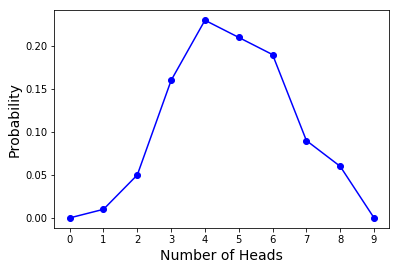

In [82]:
plt.xticks(range(n));
plt.plot(list(range(n)), probs_500, color='blue', marker='o');
plt.xlabel('Number of Heads',fontsize=14);
plt.ylabel('Probability',fontsize=14);

##Bayesian Approach



## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)